In [1]:
import numpy as np

In [2]:
def df_W(W):
    W = np.asarray(W)
    dW = np.array([0.2, 4]) * W
    return dW.astype(np.float32)

#### Gradient Descent

In [3]:
def sgd(W, dW, lr):
    return W - dW*lr

In [4]:
def train_pl(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm munimum của function f(w1, w2) = 0.1w1**2 + 2w2**2
    Arguments: 
    optimizer: function thực hiện thuật toán optimizer cụ thể
    lr -- float: learning rate
    epoch -- int: số lượng lần (epoch) lặp để tìm điểm minimum
    Returns: 
    results -- list: list các cặp điểm [w1, w2] sau mỗi epoch
    """
    # initial parameters
    W = np.array([-5, -2], dtype=np.float32)
    
    # list of results
    results = [W]
    for _ in range(epochs):
        dW = df_W(W)
        W = optimizer(W=W, dW=dW, lr=lr)
        results.append(W)
    return results

In [5]:
epochs = 30
lr = 0.4
results = train_pl(sgd, lr, epochs)

In [6]:
# w1, w2 sau 30 epochs
w1, w2 = results[-1]
print(w1)
print(w2)

-0.409831
-4.4214812e-07


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


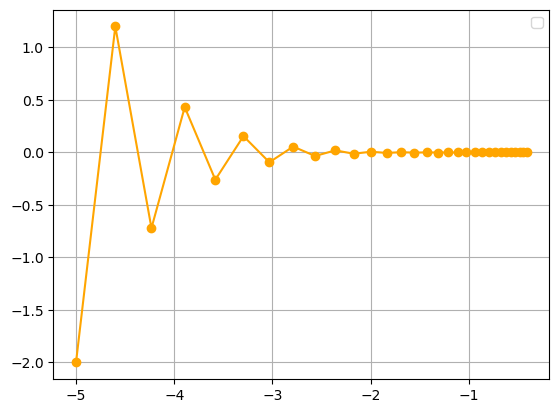

In [7]:
import matplotlib.pyplot as plt

x = np.array(results)[:, 0]
y = np.array(results)[:, 1]

plt.plot(x, y, 'o-', color='orange')
plt.grid(True)
plt.legend()

#### Gradient Descent + Momentum

In [8]:
def sgd_momentum(W, dW, lr, vt, beta):
    vt = beta*vt + (1 - beta)*dW
    W = W - lr*vt
    return W.astype(np.float32), vt

In [9]:
def train_pl(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm munimum của function f(w1, w2) = 0.1w1**2 + 2w2**2
    Arguments: 
    optimizer: function thực hiện thuật toán optimizer cụ thể
    lr -- float: learning rate
    epoch -- int: số lượng lần (epoch) lặp để tìm điểm minimum
    Returns: 
    results -- list: list các cặp điểm [w1, w2] sau mỗi epoch
    """
    # initial parameters
    W = np.array([-5, -2], dtype=np.float32)
    vt = np.array([0, 0])
    beta = 0.5
    
    # list of results
    results = [W]
    for _ in range(epochs):
        dW = df_W(W)
        W, vt = optimizer(W=W, dW=dW, lr=lr, vt=vt, beta=beta)
        results.append(W)
    return results

In [10]:
lr = 0.6
epochs = 30
results = train_pl(sgd_momentum, lr, epochs)

In [11]:
results

[array([-5., -2.], dtype=float32),
 array([-4.7,  0.4], dtype=float32),
 array([-4.2679996,  1.12     ], dtype=float32),
 array([-3.7959197 ,  0.13599999], dtype=float32),
 array([-3.3321245, -0.5192   ], dtype=float32),
 array([-2.9002993, -0.22376  ], dtype=float32),
 array([-2.5103688 ,  0.19247201], dtype=float32),
 array([-2.1647813,  0.1696216], dtype=float32),
 array([-1.8621007 , -0.04534952], dtype=float32),
 array([-1.5990344 , -0.09841566], dtype=float32),
 array([-1.3715593 , -0.00684994], dtype=float32),
 array([-1.175528  ,  0.04715285], dtype=float32),
 array([-1.0069808 ,  0.01757082], dtype=float32),
 array([-0.8622883 , -0.01830518], dtype=float32),
 array([-0.7382048 , -0.01427696], dtype=float32),
 array([-0.63187075,  0.0048695 ], dtype=float32),
 array([-0.54079145,  0.00859933], dtype=float32),
 array([-4.6280432e-01,  1.4505029e-04], dtype=float32),
 array([-0.3960425 , -0.00425615], dtype=float32),
 array([-0.33889905, -0.00134937], dtype=float32),
 array([-0.2

In [12]:
# w1, w2 sau 30 epochs
w1, w2 = results[-1]
print(w1)
print(w2)

-0.061007243
6.4516295e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


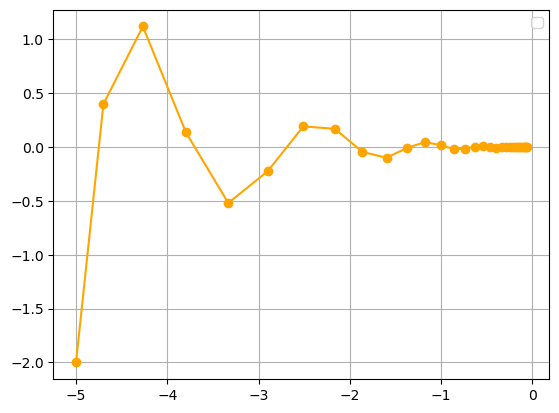

In [13]:
import matplotlib.pyplot as plt

x = np.array(results)[:, 0]
y = np.array(results)[:, 1]

plt.plot(x, y, 'o-', color='orange')
plt.grid(True)
plt.legend()

#### RMSProp

In [14]:
def rmsprop(W, dW, lr, st, gamma):
    epsilon = 1e-6
    st = gamma*st + (1 - gamma)*dW**2
    W = W - lr*dW/(np.sqrt(st + epsilon))
    return W.astype(np.float32), st

In [15]:
def train_pl(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm munimum của function f(w1, w2) = 0.1w1**2 + 2w2**2
    Arguments: 
    optimizer: function thực hiện thuật toán optimizer cụ thể
    lr -- float: learning rate
    epoch -- int: số lượng lần (epoch) lặp để tìm điểm minimum
    Returns: 
    results -- list: list các cặp điểm [w1, w2] sau mỗi epoch
    """
    # initial parameters
    W = np.array([-5, -2], dtype=np.float32)
    st = np.array([0, 0])
    gamma = 0.9
    
    # list of results
    results = [W]
    for epoch in range(epochs):
        dW = df_W(W)
        W, st = optimizer(W=W, dW=dW, lr=lr, st=st, gamma=gamma)
        results.append(W)
    return results

In [16]:
lr = 0.3
epochs = 30
results = train_pl(rmsprop, lr, epochs)

In [17]:
results

[array([-5., -2.], dtype=float32),
 array([-4.0513215, -1.0513167], dtype=float32),
 array([-3.4351976, -0.5915234], dtype=float32),
 array([-2.958937  , -0.32943937], dtype=float32),
 array([-2.5654628 , -0.17756478], dtype=float32),
 array([-2.2292054 , -0.09163254], dtype=float32),
 array([-1.9362674 , -0.04494497], dtype=float32),
 array([-1.6781768 , -0.02081422], dtype=float32),
 array([-1.4493498 , -0.00903558], dtype=float32),
 array([-1.2458819, -0.0036459], dtype=float32),
 array([-1.0649029 , -0.00135351], dtype=float32),
 array([-9.0420216e-01, -4.5644413e-04], dtype=float32),
 array([-7.6199639e-01, -1.3756282e-04], dtype=float32),
 array([-6.3677841e-01, -3.6260073e-05], dtype=float32),
 array([-5.272152e-01, -8.113367e-06], dtype=float32),
 array([-4.3207845e-01, -1.4747321e-06], dtype=float32),
 array([-3.5019845e-01, -2.0278365e-07], dtype=float32),
 array([-2.8043461e-01, -1.8423078e-08], dtype=float32),
 array([-2.2165981e-01, -7.6773987e-10], dtype=float32),
 array(

In [18]:
# w1, w2 sau 30 epochs
w1, w2 = results[-1]
print(w1)
print(w2)

-0.0030057696
-3.0050658e-17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


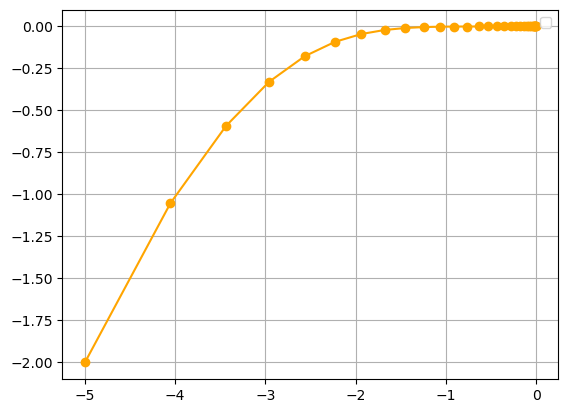

In [19]:
import matplotlib.pyplot as plt

x = np.array(results)[:, 0]
y = np.array(results)[:, 1]

plt.plot(x, y, 'o-', color='orange')
plt.grid(True)
plt.legend()

#### Adam

In [20]:
def adam(W, dW, lr, vt, st, beta1, beta2):
    """
    Thực hiện cập nhật tham số theo thuật toán Adam
    Arguments:
    W -- array: tham số cần cập nhật 
    dW -- array: đạo hàm của hàm mất mát theo W
    lr -- float: learning rate
    vt -- array: momentum tại thời điểm t
    st -- array: tích lũy gradient bình phương tại thời điểm t
    beta1 -- float: hệ số momentum
    beta2 -- float: hệ số tích lũy gradient bình phương
    Returns:
    W -- array: tham số sau khi cập nhật
    vt -- array: momentum sau khi cập nhật
    st -- array: tích lũy gradient bình phương sau khi cập nhật
    """
    epsilon = 1e-6
    vt = beta1*vt + (1 - beta1)*dW
    st = beta2*st + (1 - beta2)*dW**2
    v_corr = vt / (1 - beta1)
    s_corr = st / (1 - beta2)
    W = W - lr*(v_corr / (np.sqrt(s_corr) + epsilon))
    return W.astype(np.float32), vt, st


In [27]:
def adam(W, dW, lr, vt, st, beta1, beta2, t):
    epsilon = 1e-6
    vt = beta1*vt + (1 - beta1)*dW
    st = beta2*st + (1 - beta2)*dW**2
    v_corr = vt / (1 - beta1**t)
    s_corr = st / (1 - beta2**t)
    W = W - lr*(v_corr / (np.sqrt(s_corr) + epsilon))
    return W.astype(np.float32), vt, st

In [28]:
def train_pl(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm munimum của function f(w1, w2) = 0.1w1**2 + 2w2**2
    Arguments: 
    optimizer: function thực hiện thuật toán optimizer cụ thể
    lr -- float: learning rate
    epoch -- int: số lượng lần (epoch) lặp để tìm điểm minimum
    Returns: 
    results -- list: list các cặp điểm [w1, w2] sau mỗi epoch
    """
    # initial parameters
    W = np.array([-5, -2], dtype=np.float32)
    st = np.array([0, 0])
    vt = np.array([0, 0])
    beta1 = 0.9
    beta2 = 0.999
    
    # list of results
    results = [W]
    for epoch in range(epochs):
        dW = df_W(W)
        W, vt, st = optimizer(W=W, dW=dW, lr=lr, vt=vt, st=st, beta1=beta1, beta2=beta2, t=epoch+1)
        results.append(W)
    return results

In [29]:
lr = 0.2
epochs = 30
results = train_pl(adam, lr, epochs)

In [30]:
results

[array([-5., -2.], dtype=float32),
 array([-4.8      , -1.8000001], dtype=float32),
 array([-4.6002545, -1.6008246], dtype=float32),
 array([-4.400948 , -1.4031727], dtype=float32),
 array([-4.202277 , -1.2078784], dtype=float32),
 array([-4.00445  , -1.0159276], dtype=float32),
 array([-3.8076859 , -0.82847315], dtype=float32),
 array([-3.6122167 , -0.64684165], dtype=float32),
 array([-3.4182856, -0.4725277], dtype=float32),
 array([-3.2261467, -0.3071694], dtype=float32),
 array([-3.0360653 , -0.15249862], dtype=float32),
 array([-2.8483164 , -0.01026332], dtype=float32),
 array([-2.663185  ,  0.11787546], dtype=float32),
 array([-2.4809635 ,  0.23046157], dtype=float32),
 array([-2.3019524 ,  0.32635868], dtype=float32),
 array([-2.126457  ,  0.40484193], dtype=float32),
 array([-1.9547869,  0.4656496], dtype=float32),
 array([-1.7872533,  0.508988 ], dtype=float32),
 array([-1.6241668 ,  0.53549445], dtype=float32),
 array([-1.4658352,  0.5461715], dtype=float32),
 array([-1.31256

In [31]:
# w1, w2 sau 30 epochs
w1, w2 = results[-1]
print(w1)
print(w2)

-0.11386428
0.06793532


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


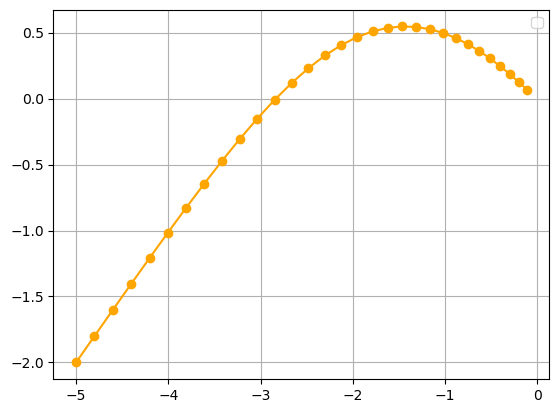

In [32]:
import matplotlib.pyplot as plt

x = np.array(results)[:, 0]
y = np.array(results)[:, 1]

plt.plot(x, y, 'o-', color='orange')
plt.grid(True)
plt.legend()